In [64]:
import pandas as pd
df = pd.read_csv('Boston.csv')
df.head(2)

,CRIME,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,high,0.0,18.10,0,0.718,3.561,87.9,1.6132,24.0,666,20.2,354.7,7.12,27.5
1,low,0.0,8.14,0,0.538,5.950,82.0,3.9900,4.0,307,21.0,232.6,27.71,13.2


In [65]:
df2 = df.fillna(df.mean(numeric_only=True))
dummied = pd.get_dummies(df['CRIME'], drop_first=True, dtype=int)
dummied.head(2)

,low,very_low
0,0,0
1,1,0


In [66]:
df3 = pd.concat([df2, dummied], axis=1)
df3 = df3.drop('CRIME', axis=1)
df3.head(2)

,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE,low,very_low
0,0.0,18.10,0,0.718,3.561,87.9,1.6132,24.0,666,20.2,354.7,7.12,27.5,0,0
1,0.0,8.14,0,0.538,5.950,82.0,3.9900,4.0,307,21.0,232.6,27.71,13.2,1,0


In [67]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
df4 = sc.fit_transform(df3)
sc_df = pd.DataFrame(df4, columns=df3.columns)
sc_df.head(2)

,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE,low,very_low
0,-0.46775,1.249826,-0.229416,1.576995,-3.49922,0.800793,-1.128755,1.846563,1.776804,0.870770,-0.303459,-0.692464,0.424585,-0.577350,-1.0
1,-0.46775,-0.337700,-0.229416,-0.048340,-0.37404,0.589124,0.019857,-0.574758,-0.462288,1.284683,-2.366667,2.336991,-1.077163,1.732051,-1.0


In [68]:
from sklearn.decomposition import PCA
model = PCA(n_components=2, whiten=True)
model.fit(sc_df)

PCA(n_components=2, whiten=True)

In [69]:
model.components_[0]

array([-0.2258543 ,  0.35923465,  0.04220985,  0.3499321 , -0.19485285,
        0.29792086, -0.29980115,  0.30726517,  0.32822012,  0.16246983,
       -0.18251937,  0.27543839, -0.2018449 ,  0.03831172, -0.31492126])

In [70]:
new = model.transform(sc_df)
new_df = pd.DataFrame(new)
new_df.head(2)

,0,1
0,1.490417,-0.680415
1,0.703223,-0.252517


In [71]:
new_df.columns = ['PC1','PC2']
new_df.head(2)

,PC1,PC2
0,1.490417,-0.680415
1,0.703223,-0.252517


In [72]:
df6 = pd.concat([sc_df,new_df], axis=1)
df6.head(2)

,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE,low,very_low,PC1,PC2
0,-0.46775,1.249826,-0.229416,1.576995,-3.49922,0.800793,-1.128755,1.846563,1.776804,0.870770,-0.303459,-0.692464,0.424585,-0.577350,-1.0,1.490417,-0.680415
1,-0.46775,-0.337700,-0.229416,-0.048340,-0.37404,0.589124,0.019857,-0.574758,-0.462288,1.284683,-2.366667,2.336991,-1.077163,1.732051,-1.0,0.703223,-0.252517


In [73]:
df_corr = df6.corr().loc[:'very_low',['PC1','PC2']]

In [74]:
df_corr['PC1'].map(abs).sort_values(ascending=False)

INDUS       0.891989
NOX         0.868891
TAX         0.814979
very_low    0.781958
RAD         0.762947
DIS         0.744414
AGE         0.739745
LSTAT       0.683921
ZN          0.560802
PRICE       0.501186
RM          0.483825
B           0.453200
PTRATIO     0.403417
CHAS        0.104808
low         0.095129
Name: PC1, dtype: float64

In [75]:
df_corr['PC2'].sort_values(ascending=False)

PRICE       0.654321
low         0.622828
RM          0.596553
AGE         0.295669
CHAS        0.291786
NOX         0.203678
B           0.083456
INDUS       0.041801
RAD        -0.151461
TAX        -0.170203
ZN         -0.226097
LSTAT      -0.263043
very_low   -0.408543
DIS        -0.432478
PTRATIO    -0.501855
Name: PC2, dtype: float64

<Axes: xlabel='City', ylabel='Exculsive residential'>

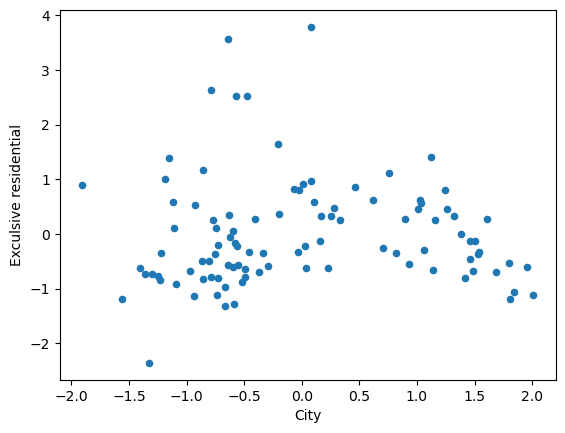

In [76]:
new_df.columns = ['City','Exculsive residential']
new_df.plot(kind='scatter', x='City', y='Exculsive residential')

In [77]:
model = PCA(whiten = True)

tmp = model.fit_transform(sc_df)
tmp.shape

(100, 15)

In [78]:
ratio = model.explained_variance_ratio_
ratio

array([0.41102789, 0.14484698, 0.10192698, 0.06448954, 0.06233684,
       0.05810331, 0.04843711, 0.02885228, 0.02142431, 0.01831962,
       0.01572944, 0.01068611, 0.00918466, 0.00277548, 0.00185945])

In [79]:
array=[]
for i in range(len(ratio)):
    ruiseki = sum(ratio[0:(i+1)])
    array.append(ruiseki)
    
pd.Series(array).plot(kind='line')

TypeError: 'numpy.float64' object is not callable

In [ ]:
sum = 0
for i in range(15):
    sum = sum + ex_ra[i]
    if sum >= 0.8:
        break
print(f'{i+1}番目までの列で累積寄与率は{sum*100}%に達します')